In [1]:
import os
import glob
import geopandas as gpd
import contextily as ctx
from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/Umbra/"

# dem_fn = directory + "umbra_aligned2wv_med_mos.tif"
# shortname = "umbra_aligned2wv_med_mos"

# dem_fn = directory + "umbra_aligned2wv_wt_avg_mos.tif"
# shortname = "umbra_aligned2wv_wt_avg_mos"

dem_fn = directory + "20240506_1545_10300100FB53F000_10300100FB306000_2.0m-DEM_trans_dx-1.48m_dy+1.53m_dz-0.97m.tif"
shortname = "WV_20240506"

map_crs = "32617"

ctx_kwargs = {
    "crs": f"EPSG:{map_crs}",
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}


ICESat-2 ATL06 request processing for: high_confidence
Existing file found, reading in: atl06sr_WV_20240506_res20_len40_cnt10_ats20_maxi5_high_confidence.parquet
Filtering ATL06-SR high_confidence
Existing file found, reading in: atl06sr_WV_20240506_res20_len40_cnt10_ats20_maxi5_high_confidence_filtered.parquet

ICESat-2 ATL06 request processing for: ground
Existing file found, reading in: atl06sr_WV_20240506_res20_len40_cnt10_ats20_maxi5_ground.parquet
Filtering ATL06-SR ground
Existing file found, reading in: atl06sr_WV_20240506_res20_len40_cnt10_ats20_maxi5_ground_filtered.parquet

ICESat-2 ATL06 request processing for: canopy
Existing file found, reading in: atl06sr_WV_20240506_res20_len40_cnt10_ats20_maxi5_canopy.parquet
Filtering ATL06-SR canopy
Existing file found, reading in: atl06sr_WV_20240506_res20_len40_cnt10_ats20_maxi5_canopy_filtered.parquet

ICESat-2 ATL06 request processing for: top_of_canopy
Existing file found, reading in: atl06sr_WV_20240506_res20_len40_cnt10_ats20

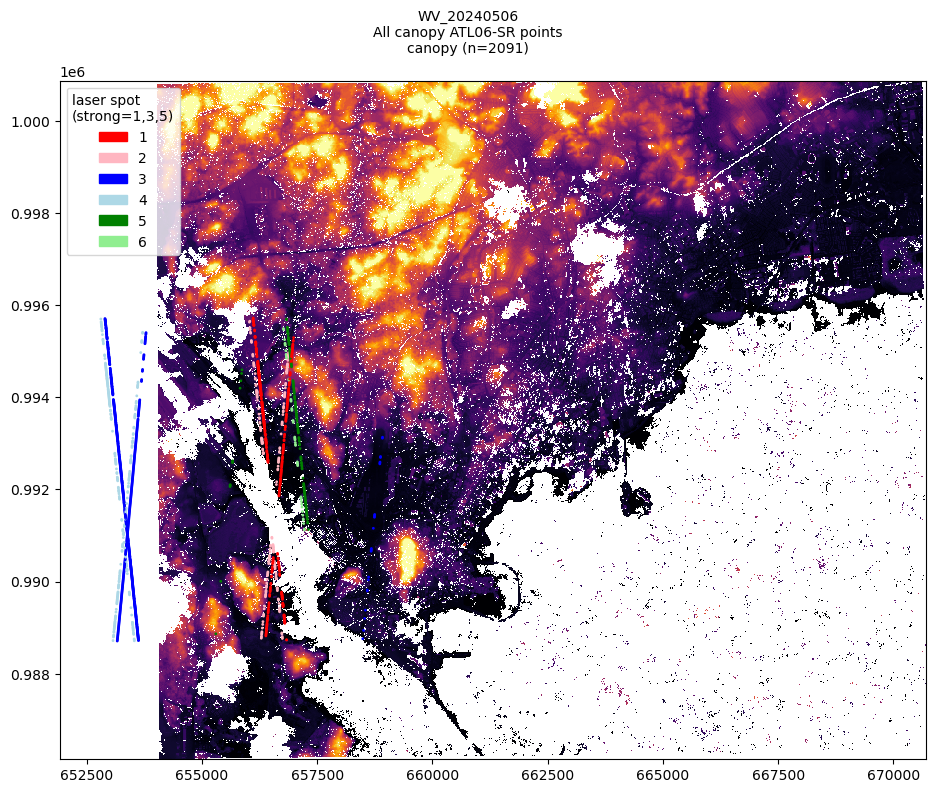

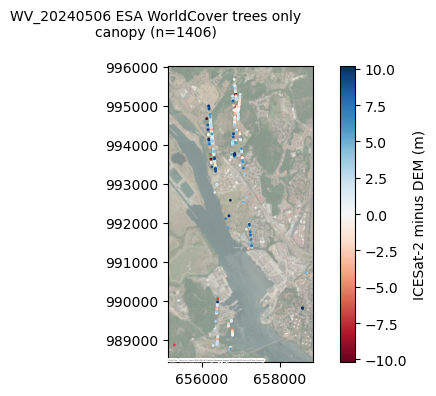

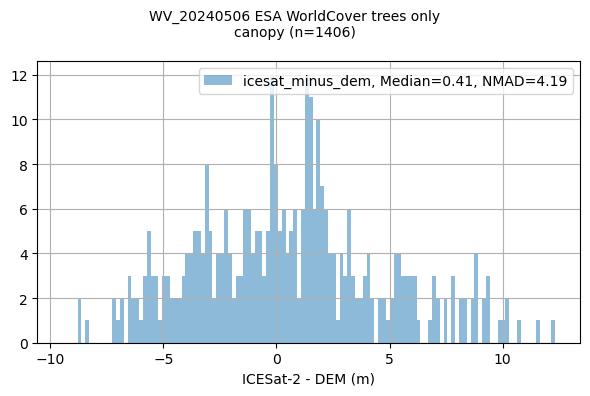

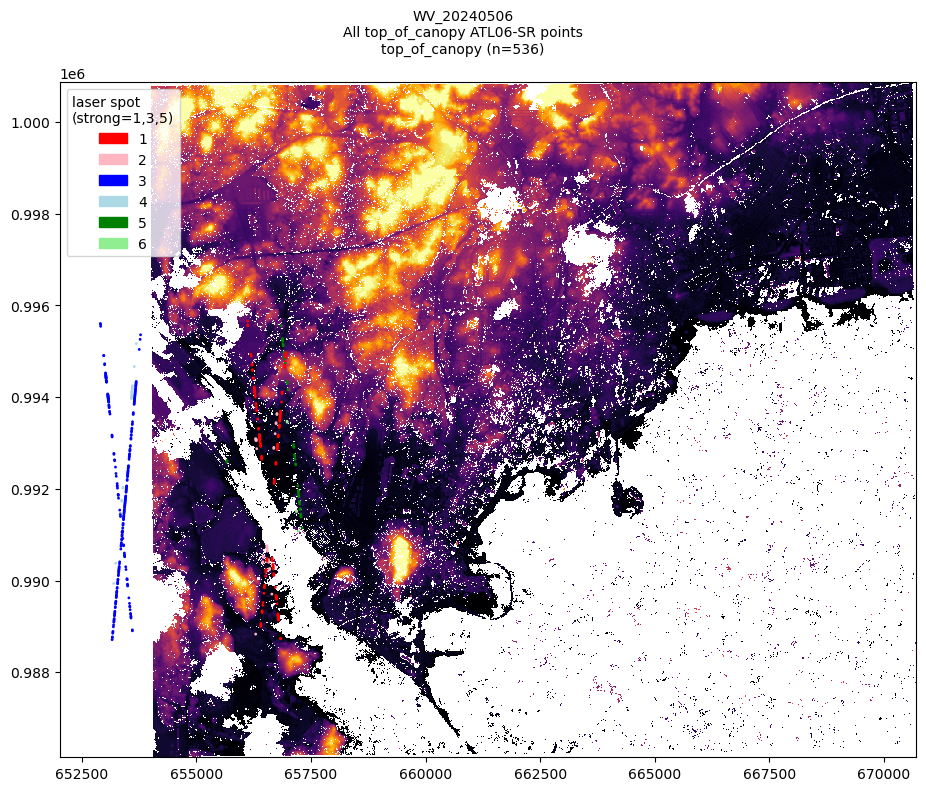

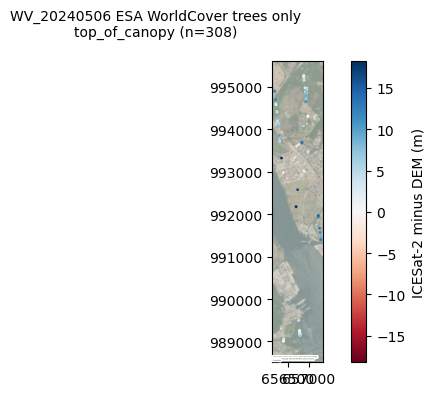

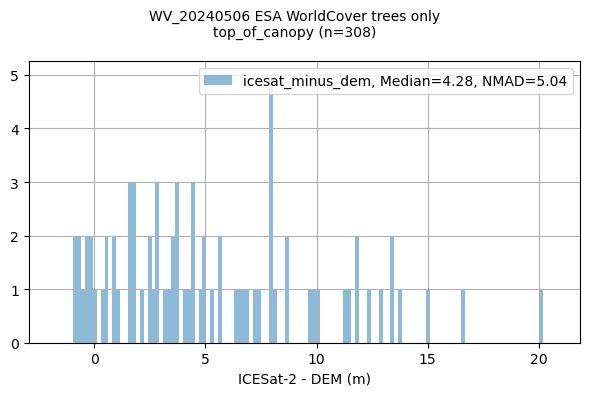

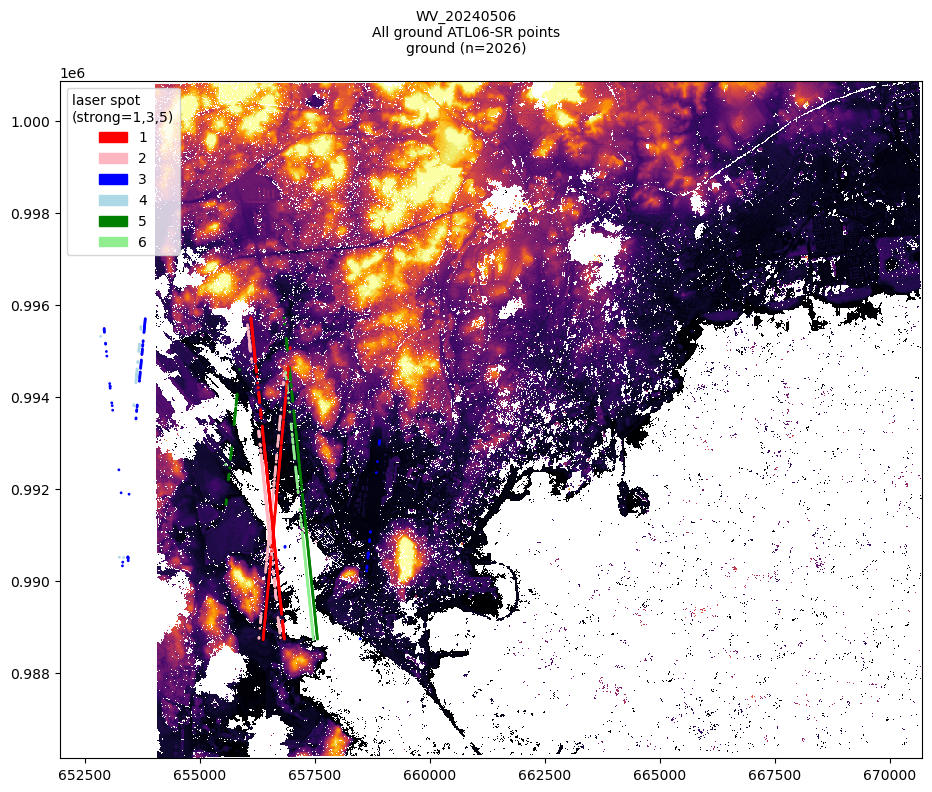

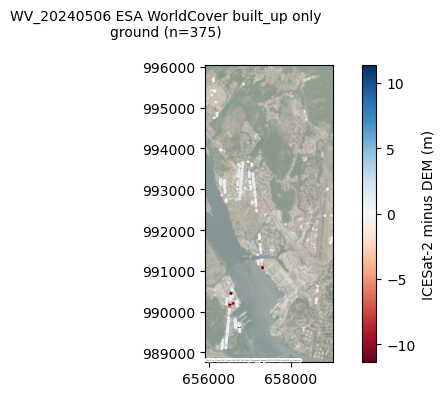

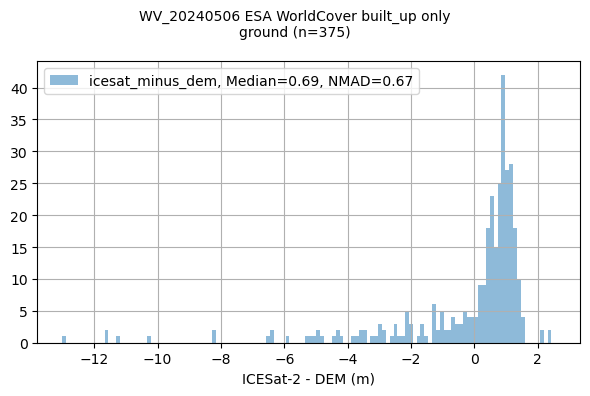

In [6]:
for esa_worldcover, retain, key in [("trees", True, "canopy"), ("trees", True, "top_of_canopy"), ("built_up", True, "ground")]:

    icesat = Altimetry(directory=directory, dem_fn=dem_fn)
    icesat.request_atl06sr_multi_processing(
        save_to_parquet=True,
        filename=f"atl06sr_{shortname}",
        region=[{'lon': -79.61129214234252, 'lat': 8.941708670726364}, {'lon': -79.61129214234252, 'lat': 9.005220098927467}, {'lon': -79.55031277500593, 'lat': 9.005220098927467}, {'lon': -79.55031277500593, 'lat': 8.941708670726364}, {'lon': -79.61129214234252, 'lat': 8.941708670726364}]
    )

    icesat.plot_atl06sr(
        key=key,
        title=f"{shortname}\nAll {key} ATL06-SR points",
        map_crs=map_crs,
        plot_dem=True,
        plot_beams=True,
        figsize=(10, 8),
        **ctx_kwargs
    )

    if retain:
        icesat.filter_esa_worldcover(retain_only=esa_worldcover)
    else:
        icesat.filter_esa_worldcover(filter_out=esa_worldcover)

    # icesat.plot_atl06sr(
    #     key=key,
    #     title=shortname + " ESA WorldCover " + esa_worldcover + " only",
    #     map_crs=map_crs,
    #     # plot_dem=True,
    #     # plot_beams=True,
    #     **ctx_kwargs
    # )

    icesat.mapview_plot_atl06sr_to_dem(
        key=key,
        title=shortname + " ESA WorldCover " + esa_worldcover + " only",
        # plot_dem=True,
        **ctx_kwargs,
    )

    icesat.histogram(
        key=key,
        title=shortname + " ESA WorldCover " + esa_worldcover + " only",
    )